<a href="https://colab.research.google.com/github/ysy56/vacation/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 단원

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import pandas as pd

In [ ]:
t = (1, 2, 3, 4)
print(type(t))

<class 'tuple'>


In [ ]:
t1 = (1,)
print(type(t))

<class 'tuple'>


In [ ]:
my_dict = {'yes':1, 'no':0}
print(my_dict)

{'yes': 1, 'no': 0}


In [ ]:
print(my_dict.items())

dict_items([('yes', 1), ('no', 0)])


In [ ]:
print(my_dict.keys())

dict_keys(['yes', 'no'])


In [ ]:
print(my_dict.values())

dict_values([1, 0])


# 2 단원

In [ ]:
def f(x):
  return (2 * x**2 + 2)

import numpy as np

x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [ ]:
y = f(x)

In [ ]:
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


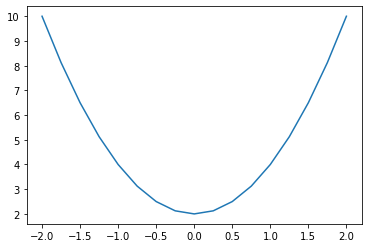

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [ ]:
def f1(x):
  return(x**2)

def f2(x):
  return x*2

def f3(x):
  return (x+2)

x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [ ]:
import torch.nn as nn

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 64, out_channels = 30, kernel_size = 5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )
    self.layer3 = nn.Sequential(
        nn.Linear(in_features = 30*5*5, out_features = 10, bias = True),
        nn.ReLU(inplace=True)
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0], -1)
    x = self.layer3(x)
    return x1

model = MLP()
print("printing children \n====================")
print(list(model.children()))
print("\n\nprinting Modules \n====================")
print(list(model.modules()))


printing children 
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


printing Modules 
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/비교과/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


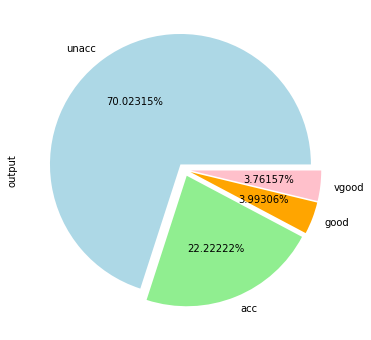

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [ ]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [ ]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [ ]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [ ]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
print(categorical_column_sizes)
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[4, 4, 4, 3, 3, 3]
[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [ ]:
total_records = 1728
test_records = int(total_records * 0.2)
categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records : total_records]

train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]


In [ ]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [ ]:
class Model(nn.Module):
  def __init__(self, embedding_size, output_size, layers, p = 0.4):
    super().__init__()
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []
    num_categorical_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_categorical_cols

    for i in layers:
      all_layers.append(nn.Linear(input_size, i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)

  def forward(self, x_categorical):
    embeddings = []
    for i, e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:,i]))
    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)
    x = self.layers(x)
    return x


In [ ]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [ ]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device = device, dtype = torch.int64)

for i in range(epochs):
  i+=1
  y_pred = model(categorical_train_data).to(device)
  single_loss = loss_function(y_pred, train_outputs)

  if i%25 == 0:
    print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
  
  optimizer.zero_grad()
  single_loss.backward()
  optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:  25 loss: 1.35390925
epoch:  50 loss: 1.25017846
epoch:  75 loss: 1.17954326
epoch: 100 loss: 1.05165601
epoch: 125 loss: 0.91597593
epoch: 150 loss: 0.81458139
epoch: 175 loss: 0.74364120
epoch: 200 loss: 0.69714141
epoch: 225 loss: 0.65062910
epoch: 250 loss: 0.63492179
epoch: 275 loss: 0.61429161
epoch: 300 loss: 0.59942007
epoch: 325 loss: 0.60537004
epoch: 350 loss: 0.58819842
epoch: 375 loss: 0.58303529
epoch: 400 loss: 0.57658118
epoch: 425 loss: 0.58026373
epoch: 450 loss: 0.57374173
epoch: 475 loss: 0.57368207
epoch: 500 loss: 0.56943774
epoch: 500 loss: 0.5694377422


In [ ]:
test_outputs = test_outputs.to(device = device, dtype = torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data)
  loss = loss_function(y_val.to(device = device), test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.56985450


In [ ]:
print(y_val[:5])

tensor([[ 1.4627,  0.5382, -2.0732, -2.2883],
        [ 2.5339,  1.3488, -3.8839, -3.9656],
        [ 2.6903,  1.8105, -4.0508, -3.9761],
        [ 6.4041,  4.9178, -6.3244, -5.8235],
        [ 2.1262,  1.1143, -3.2015, -3.1880]])


In [ ]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs.cpu(), y_val))
print(classification_report(test_outputs.cpu(), y_val))
print(accuracy_score(test_outputs.cpu(), y_val))

[[258   1]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7478260869565218


# 3 단원


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('/content/drive/MyDrive/비교과/iris.csv', names=names)
# 데이터 iris.data 없음...

In [5]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.02)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [9]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: ", accuracy_score(y_test, y_pred))

정확도:  0.6666666666666666


In [10]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
  classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1, "입니다")  

정확도 1.0 으로 최적의 k는 1 입니다


In [28]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [29]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state = 42)

In [30]:
print(X_train[:5])

[[5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]]


In [31]:
svm = svm.SVC(kernel = 'linear', C=1.0, gamma=0.5)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print("정확도 ", score)

정확도  0.9888888888888889


3강 1시간 6분까지...

이유: 데이터가 없고 코드도 보기 힘들다..